# Trend

In [21]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Get the Data

In [22]:
#AccRegNZTS13 (Accommodation Survey): Guest Nights by Region (Monthly) in thousands
df1 = pd.read_csv('31 AccRegNZTS13.csv')

def fun_date (x):
    y = x[:4]
    m = x[5:]
    d = datetime.strptime("{0} {1} {2} 00:00:00".format(y,m,'01'), "%Y %m %d %H:%M:%S")
    return d
df1['obsdate'] = df1['Month'].apply(fun_date)

df1.index= df1['obsdate']
df1.drop(['Month','obsdate'],axis=1,inplace=True)
df1.head()

,Northland,Auckland,Waikato,BayofPlenty,HawkesBayGisborne,TarManWan,Wellington,NelMarlbTas,Canterbury,WestCoast,Otago,Southland,NewZealand
obsdate,,,,,,,,,,,,,
1996-07-01,66,257,124,159,49,93,111,52,209,27,175,21,1342
1996-08-01,58,266,111,138,45,89,105,54,210,28,211,23,1337
1996-09-01,79,264,140,174,62,115,113,79,256,45,214,31,1572
1996-10-01,96,280,147,177,61,111,119,79,256,57,194,41,1621
1996-11-01,104,334,159,199,66,112,132,100,324,64,212,54,1861


In [23]:
#AccomNZTS12 (Accommodation Survey): Occupancy rate (percent) and average stay length (in days)
df2 = pd.read_csv('32 AccomNZTS12.csv')

def fun_date (x):
    y = x[:4]
    m = x[5:]
    d = datetime.strptime("{0} {1} {2} 00:00:00".format(y,m,'01'), "%Y %m %d %H:%M:%S")
    return d
df2['obsdate'] = df2['Month'].apply(fun_date)

df2.index= df2['obsdate']
df2.drop(['Month','obsdate'],axis=1,inplace=True)
df2.head()

,TotOccRate,HotelOccRate,MotelOccRate,BPOccRate,HPOccRate,TotnotHPOccRate,TotAveStay,HotelAveStay,MotelAveStay,BPAveStay,HPAveStay,TotnotHPAveStay
obsdate,,,,,,,,,,,,
1996-07-01,27.6,46.7,49.6,37.1,6.5,46.0,2.0,1.8,2.0,2.3,2.7,1.9
1996-08-01,26.3,47.8,45.1,36.2,6.1,44.6,2.1,1.9,2.0,2.4,2.7,2.0
1996-09-01,28.7,48.9,52.1,37.6,7.8,47.9,2.0,1.9,2.0,2.5,2.4,2.0
1996-10-01,30.5,53.0,52.9,39.1,9.0,50.3,1.9,1.7,1.9,2.4,2.3,1.8
1996-11-01,34.2,62.0,59.1,49.3,9.4,58.5,1.8,1.8,1.8,2.1,2.0,1.8


# 2. Hodrick-Prescott Filter

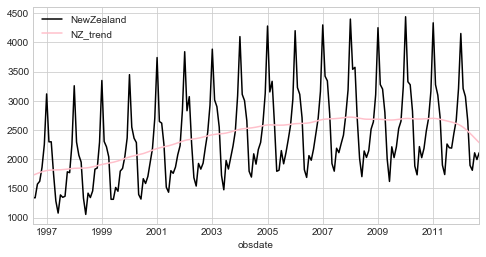

In [24]:
#AccRegNZTS13 (Accommodation Survey): Guest Nights by Region (Monthly) in thousands
NZ_cycle, NZ_trend = sm.tsa.filters.hpfilter(df1['NewZealand'])
df1['NZ_trend'] = NZ_trend

df1['NewZealand'].plot(color='black', figsize=(8,4),label='NewZealand')
df1['NZ_trend'].plot(color='pink',label='NZ_trend')
plt.legend()

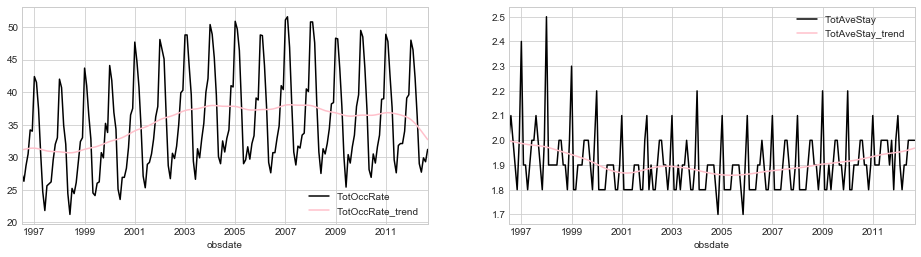

In [25]:
#AccomNZTS12 (Accommodation Survey): Occupancy rate (percent) and average stay length (in days)
NZ_cycle, NZ_trend = sm.tsa.filters.hpfilter(df2['TotOccRate'])
df2['TotOccRate_trend'] = NZ_trend

NZ_cycle, NZ_trend = sm.tsa.filters.hpfilter(df2['TotAveStay'])
df2['TotAveStay_trend'] = NZ_trend

plt.subplot(1,2,1)
df2['TotOccRate'].plot(color='black', figsize=(16,4),label='TotOccRate')
df2['TotOccRate_trend'].plot(color='pink',label='TotOccRate_trend')
plt.legend()

plt.subplot(1,2,2)
df2['TotAveStay'].plot(color='black', figsize=(16,4),label='TotAveStay')
df2['TotAveStay_trend'].plot(color='pink',label='TotAveStay_trend')
plt.legend()

# 3. ETS-Decomposition

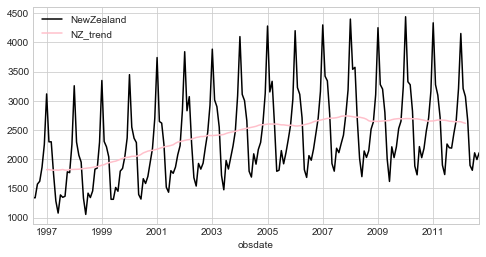

In [26]:
#AccRegNZTS13 (Accommodation Survey): Guest Nights by Region (Monthly) in thousands
result = seasonal_decompose(df1['NewZealand'], model='additive')

df1['NewZealand'].plot(color='black', figsize=(8,4),label='NewZealand')
result.trend.plot(color='pink',label='NZ_trend')
plt.legend()

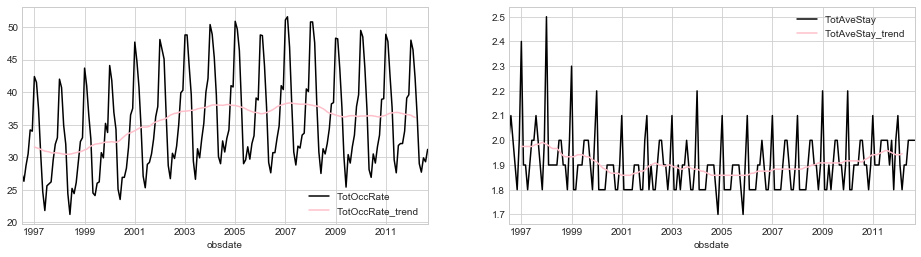

In [27]:
#AccomNZTS12 (Accommodation Survey): Occupancy rate (percent) and average stay length (in days)
result = seasonal_decompose(df2['TotOccRate'], model='additive')
plt.subplot(1,2,1)
df2['TotOccRate'].plot(color='black', figsize=(16,4),label='TotOccRate')
result.trend.plot(color='pink',label='TotOccRate_trend')
plt.legend()

result = seasonal_decompose(df2['TotAveStay'], model='additive')
plt.subplot(1,2,2)
df2['TotAveStay'].plot(color='black', figsize=(16,4),label='TotAveStay')
result.trend.plot(color='pink',label='TotAveStay_trend')
plt.legend()